
# Hodograph Inset

Layout a Skew-T plot with a hodograph inset into the plot.


## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import metpy.calc as mpcalc
from metpy.cbook import get_test_data
from metpy.plots import add_metpy_logo, Hodograph, SkewT
from metpy.units import units

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

## Obtain Data and Format

Upper air data can be obtained using the siphon package, but for this example we will use some of MetPy's sample data.
`as_file_obj=False), skiprows=5, usecols=[0, 1, 2, 3, 6, 7], names=col_names)` is necessary due to the formatting of the MetPy sample data. This formatting is not needed when using upper air data obtained via Siphon. Obtaining data with Siphon will be covered in a later notebook. 

In [2]:
col_names = ['pressure', 'height', 'temperature', 'dewpoint', 'direction', 'speed']

sounding_data = pd.read_fwf(get_test_data('may4_sounding.txt', as_file_obj=False),
                 skiprows=5, usecols=[0, 1, 2, 3, 6, 7], names=col_names)

# Drop any rows with all not a number (NaN) values for temperature, dewpoint, and winds
sounding_data = sounding_data.dropna(subset=('temperature', 'dewpoint', 'direction', 'speed'
                       ), how='all').reset_index(drop=True)

## Assign Units

We will pull the data out of the example dataset into individual variables and assign units. This is explained in further detain in the Simple Sounding notebook and in the [Metpy documentation](https://unidata.github.io/MetPy/latest/tutorials/unit_tutorial.html).


In [3]:
pres = sounding_data['pressure'].values * units.hPa
temp = sounding_data['temperature'].values * units.degC
dewpoint = sounding_data['dewpoint'].values * units.degC
wind_speed = sounding_data['speed'].values * units.knots
wind_dir = sounding_data['direction'].values * units.degrees
u, v = mpcalc.wind_components(wind_speed, wind_dir)

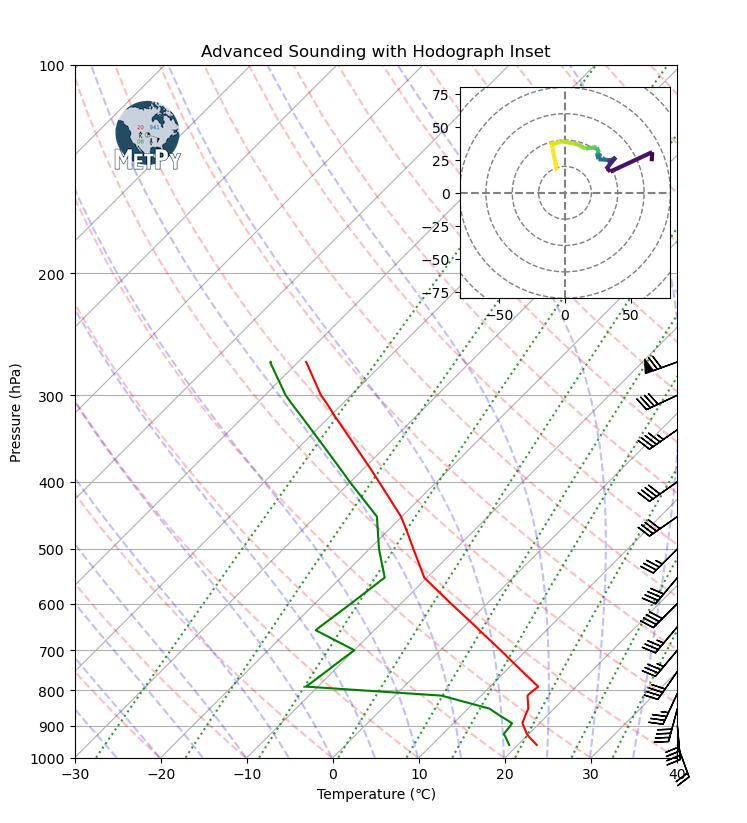

In [4]:
# Create figure and grid for plots
fig = plt.figure(figsize=(9, 9))
skew = SkewT(fig, rotation=45)

# Plot temperature and dewpoint lines
skew.plot(pres, temp, 'red')
skew.plot(pres, dewpoint, 'green')

# Plot wind barbs
my_interval = np.arange(100, 1000, 50) * units('hPa')
ix = mpcalc.resample_nn_1d(pres, my_interval)
skew.plot_barbs(pres[ix], u[ix], v[ix])

# Improve labels and set axis limits
skew.ax.set_xlabel('Temperature (\N{DEGREE CELSIUS})')
skew.ax.set_ylabel('Pressure (hPa)')
skew.ax.set_ylim(1000, 100)
skew.ax.set_xlim(-30, 40)

# Add the relevant special lines
skew.plot_dry_adiabats(t0=np.arange(233, 533, 10) * units.K, alpha=0.25, color='orangered')
skew.plot_moist_adiabats(t0=np.arange(233, 400, 5) * units.K, alpha=0.25, color='tab:green')
skew.plot_mixing_lines(pressure=np.arange(1000, 99, -25) * units.hPa, linestyle='dotted', color='tab:blue')

# Create a hodograph
ax_hod = inset_axes(skew.ax, '35%', '35%', loc=1)
h = Hodograph(ax_hod, component_range=80)
h.add_grid(increment=20)
h.plot_colormapped(u, v, pres)

# Add the MetPy logo!
fig = plt.gcf()
add_metpy_logo(fig, 110, 650, size='small');

# Add title
skew.ax.set_title('Advanced Sounding with Hodograph Inset');